# Analysis of *Felis Catus* behavior

In this notebook we explore the effect of surprises on cats.

# Setup

In [1]:
%pip install --upgrade --no-deps git+https://github.com/deflaux/catterplotpy.git@nd-fix-cat-parameter

# TODO switch back to this when PR is merged https://github.com/eteq/catterplotpy/pull/2.
#%pip install --upgrade https://github.com/eteq/catterplotpy/tarball/master

  Cloning https://github.com/deflaux/catterplotpy.git (to revision nd-fix-cat-parameter) to /tmp/pip-req-build-8yux8brc
  Running command git clone --filter=blob:none --quiet https://github.com/deflaux/catterplotpy.git /tmp/pip-req-build-8yux8brc
  Running command git checkout -b nd-fix-cat-parameter --track origin/nd-fix-cat-parameter
  Switched to a new branch 'nd-fix-cat-parameter'
  Branch 'nd-fix-cat-parameter' set up to track remote branch 'nd-fix-cat-parameter' from 'origin'.
  Resolved https://github.com/deflaux/catterplotpy.git to commit 387d673d9e391eefa3edeac1f287279d679c8659
  Preparing metadata (setup.py) ... done
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from catterplot import catter
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

# Data sampling and curation

In the accompanying data table, you can see the data that was meticulously and rigorously collected in the *Felis Catus* behavior experiment. Elapsed time and elevation measurements were gathered from the *Felis Catus* [historical video records](https://www.youtube.com/watch?v=6U_XREUMOAU). 

Each of the samples obtained include the initial point of suprise, max elevation obtained, and final elevation.

Samples with discontinous initial and final elevations (e.g. those of a cat leaping off of a bed or other furniture) were discarded for the purpose of this behavior analysis.

In [3]:
data = {'sample-name': ['SC-01','SC-02','SC-03','SC-04','SC-05'], 
        'video-ts': ['0:01:00','0:19:00','0:22:00','0:32:00','1:25:00',],
        't-initial (ms)': [0,0,0,0,0],
        't-max (ms)': [249,350,300,305,250],
        't-final (ms)': [500,700,620,635,485],
        'max-elevation (mm)': [450,750,500,500,350]}
df = pd.DataFrame.from_dict(data)
df

,sample-name,video-ts,t-initial (ms),t-max (ms),t-final (ms),max-elevation (mm)
0,SC-01,0:01:00,0,249,500,450
1,SC-02,0:19:00,0,350,700,750
2,SC-03,0:22:00,0,300,620,500
3,SC-04,0:32:00,0,305,635,500
4,SC-05,1:25:00,0,250,485,350


# Model creation

We created a mathematical model of surprised *Felis Catus*<sup>*</sup> elevations over time, which closely matches the observed behavior, based upon simplified Newtonian physics.


---



\* a surprised *Felis Catus* is perhaps more accurately named [*Miratus*](https://www.google.com/search?q=latin+Miratus+to+english&rlz=1CAOTWH_enUS896&sxsrf=APq-WBuOE6NGJE-cKAgk7J2wu2FE7w018g%3A1647822636169&ei=LMc3Yuj5BO6c0PEPw_q2wAw&ved=0ahUKEwjov4HX-dX2AhVuDjQIHUO9DcgQ4dUDCA4&uact=5&oq=latin+Miratus+to+english) *Felis Catus*

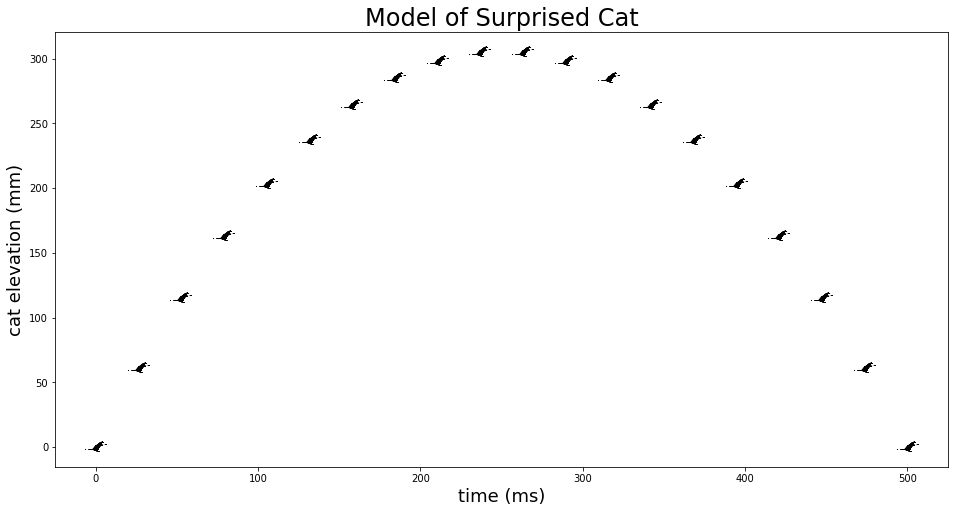

In [4]:
plt.rcParams['figure.figsize'] = [16, 8]

t = t1 = np.linspace(0, 500, 20) # Units are in milliseconds (ms).

g = (9.8 * 1000) / (1000**2)   # Gravity (mm/ms**2).
y0 = 0           # Initial height of cat prior to surprise (mm).
v0y = 2.45       # Initial vertical velocity of suprised cat (mm/ms).

y = y0 + v0y*t - 1/2*g*t**2

catter(x = t, y = y, s=750, cat=2)

plt.xlabel('time (ms)', fontsize=18)
plt.ylabel('cat elevation (mm)', fontsize=18)
plt.title('Model of Surprised Cat', fontsize=24)
plt.show()

# Application of model to obtained data set

Applying the model allows us to extrapolate intervening data points not recorded during initial data gathering, and to perform repeated theoretical experiments.  This likely would have been quite challenging to do with a real cat, as it is unlikely to have tolerated such shenanigans. 

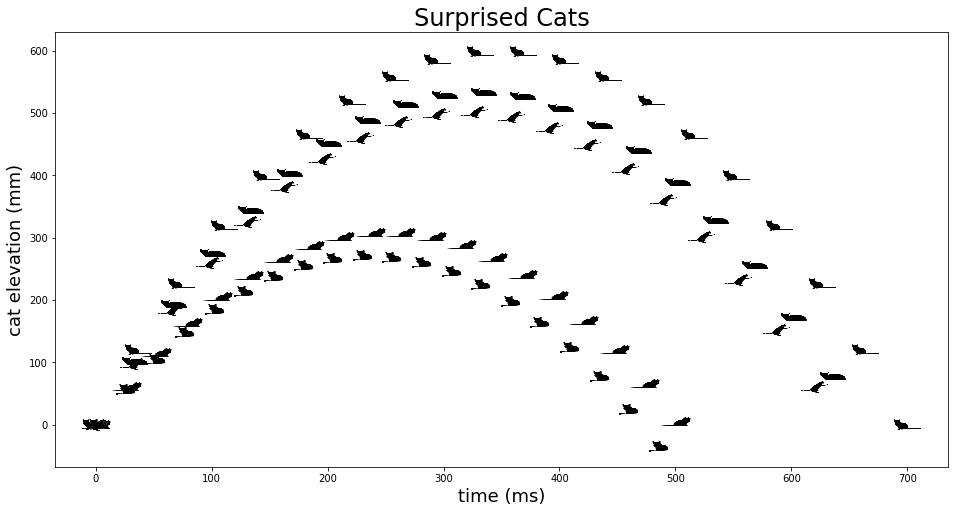

In [5]:
plt.rcParams['figure.figsize'] = [16, 8]

## Append calculated landing velocity to dataframe.
df['landing-velocity (mm/ms)'] = 9.8 / 1000 * (df['t-final (ms)'] - df['t-max (ms)'])

## Generate Catterplot for each sample taken from the historical records.
for index, row in df.iterrows():
        t = t1 = np.linspace(0, row['t-final (ms)'], 20) # Units are in milliseconds (ms).

        g = (9.8 * 1000) / (1000**2)   # Gravity (mm/ms**2)
        y0 = 0           # Initial height of cat prior to surprise (mm).


        v0y = row['landing-velocity (mm/ms)']  ## Approximate initial velocity to be same as landing velocity.

        y = y0 + v0y*t - 1/2*g*t**2
        catter(x = t, y = y, s=1500, cat=index)

plt.xlabel('time (ms)', fontsize=18)
plt.ylabel('cat elevation (mm)', fontsize=18)
plt.title('Surprised Cats', fontsize=24)
plt.show()

# Discussion

As you can see, when cats are surprised, the result is an initial rapid gain in elevation followed by a corresponding reduction in elevation. The elevation plateau observed at the temporal mid-point as cat velocity approaches zero is due to the constant deceleration applied to the cat by the force of gravity. It at this mid-point that max elevation is achieved. 

After reaching max elevation and with negligible air-resistance at these velocities, the cat will experience free-fall, aka zero gravity from the cat's frame of reference. Throughout the cat's descent, elevation decreases faster and faster as gravity accelerates them earthbound, until their velocity comes to a stop as they return to their initial starting elevation.

<div class="alert alert-block alert-info">
For more detail on these scientific results, see the relevant <a href='https://github.com/eteq/catterplotpy'>literature</a>. The journal article is expected to appear in Nature on April 1, 2022.
</div>

## Potential future *Felis Catus* modeling

Development of a more complex model could perhaps answer additional questions, such as: 
 * Does air-resistance come into play as velocity increases, and if so, then what sort of an impact does fluffy vs short-haired cat species have?
 * Could terminal velocity (where air resistance cancels out the acceleration due to gravity) be reached on the return trip to earth?
   * What initial veritical leap velocity would be necessary to achieve this?
   * Is it even possible to surprise *Felis Catus* sufficiently for that leap to occur?

# Provenance

In [6]:
print(datetime.now())

2022-03-28 14:56:26.805879


In [7]:
!pip3 freeze

catterplot @ git+https://github.com/deflaux/catterplotpy.git@387d673d9e391eefa3edeac1f287279d679c8659


Copyright 2022 The Broad Institute, Inc., Verily Life Sciences, LLC All rights reserved.

This software may be modified and distributed under the terms of the BSD license. See the LICENSE file for details.